# Logistic Regression, MLP, and SGD for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the logistic regression, multilayer perceptron and stochastic gradient descent  algorithms. The XLB file is where we modularized the training and validation process

In [2]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold

from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif
from XLB import *

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column this is done by the extract_data function from the XLB file which takes the filename of the dataset as a parameter

---

After the initial preprocessing step, we sperated the music features and the labelled emotion into the x_train and y_train arrays respectively. We also used the scikit learn min max scaler to normalize the dataset.

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# 33.33% 0.24
feat_sel_2 = SelectFromModel(\
                estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 69) (750,)
(750, 69) (750,)


Here we perform different methods to deal with imbalanced datasets. We used the oversampling and SMOTE methodology 

The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the logistic regression object and the hyperparameter search object.

In [3]:
# LogisticRegression, RandomizedSearch
random_search_iterations = 500
k_folds = 5
rand_seed = 3249807

parameters = {
    'penalty':['l1','l2', 'elasticnet', 'none'], 
    'dual' : [True, False],
    'C': np.logspace(-10,1,1000),
    'fit_intercept' : [True,False],
    'class_weight' : ['balanced', None],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'liblinear', 'saga'],
    'max_iter' : [200],
    'l1_ratio' : uniform(loc=0,scale=1),
    'warm_start': [True, False]
}
mnb = LogisticRegression(random_state=rand_seed)
random_search_logreg = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                          n_iter=random_search_iterations,\
                                          random_state=rand_seed,n_jobs=-1)

The following cells are where the logistice regression model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3291
C => 0.04871780218794621
class_weight => None
dual => False
fit_intercept => False
l1_ratio => 0.637346992998149
max_iter => 200
penalty => l2
solver => liblinear
warm_start => False
Splits: 5
Vanilla Train Accuracy: 37.1571%
Vanilla Validation Accuracy: 14.29%
Vanilla F1-score: 0.05


(14.285714285714285, 0.047619047619047616)

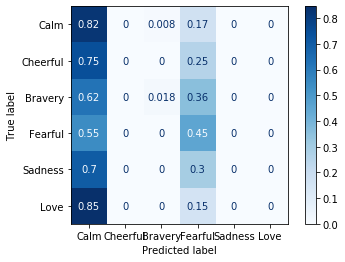

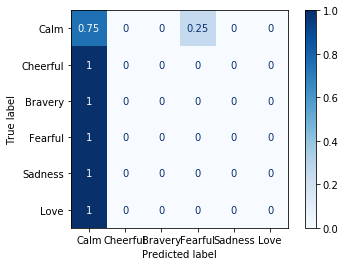

In [4]:
print_res("Vanilla",x_train,y_train,random_search_logreg)
test_res("Vanilla",x_val,y_val,random_search_logreg)

Best Score: 0.5400
C => 2.71289780037247e-08
class_weight => None
dual => False
fit_intercept => True
l1_ratio => 0.5630999447045318
max_iter => 200
penalty => none
solver => newton-cg
warm_start => False
Splits: 5
Random Oversampling Train Accuracy: 68.5333%
Random Oversampling Validation Accuracy: 14.29%
Random Oversampling F1-score: 0.11


(14.285714285714285, 0.10793650793650793)

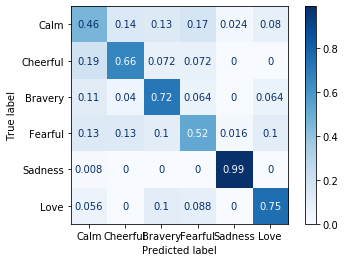

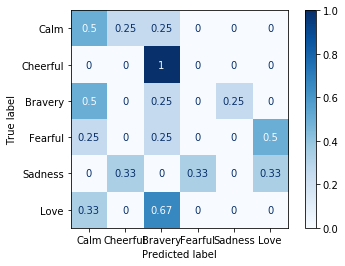

In [5]:
print_res("Random Oversampling",x_os,y_os,random_search_logreg)
test_res("Random Oversampling",x_val,y_val,random_search_logreg)

Best Score: 0.5573
C => 2.71289780037247e-08
class_weight => None
dual => False
fit_intercept => True
l1_ratio => 0.5630999447045318
max_iter => 200
penalty => none
solver => newton-cg
warm_start => False
Splits: 5
SMOTE Train Accuracy: 69.4667%
SMOTE Validation Accuracy: 33.33%
SMOTE F1-score: 0.24


(33.33333333333333, 0.24146224146224146)

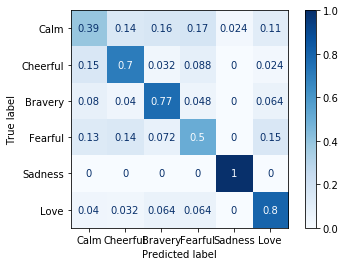

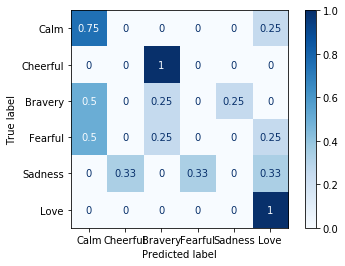

In [6]:
print_res("SMOTE",x_smote,y_smote,random_search_logreg)
test_res("SMOTE",x_val,y_val,random_search_logreg)

In [3]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# f_classif 47.62% 0.43
feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


This cell instantiates the multilayer perceptron object and the hyperparameter search object.

In [4]:
# MLPClassifier, RandomizedSearch
random_search_iterations = 80
k_folds = 10
rand_seed = 3249807

parameters = {
    'activation':['logistic', 'tanh', 'relu'], 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha': [3e-4],
    'batch_size' : [min(200,int(np.power(2,i))) for i in range(4,8)],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [750],
    'shuffle' : [True,False],
    'momentum' : uniform(loc=0.2,scale=0.8),
    'nesterovs_momentum' : [True,False],
    'early_stopping' : [True,False]
}
mlp = MLPClassifier(random_state=rand_seed)
random_search_mlp = RandomizedSearchCV(mlp, parameters,cv=k_folds,\
                                       n_iter=random_search_iterations,\
                                       random_state=rand_seed, n_jobs=-1)

The following cells are where the multilayer perceptron model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set.

Best Score: 0.3541
activation => relu
alpha => 0.0003
batch_size => 128
early_stopping => False
learning_rate => invscaling
max_iter => 750
momentum => 0.4643677585442129
nesterovs_momentum => False
shuffle => False
solver => adam
Splits: 10
Vanilla Train Accuracy: 62.5935%
Vanilla Validation Accuracy: 33.33%
Vanilla F1-score: 0.32


(33.33333333333333, 0.31964785914365745)

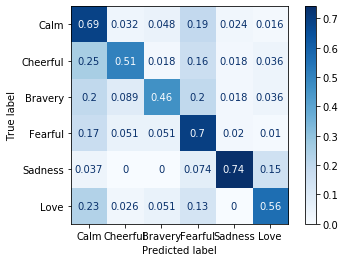

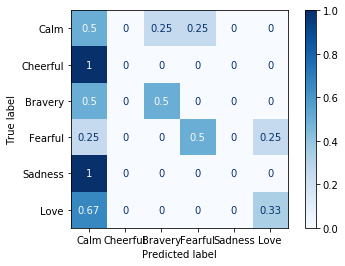

In [5]:
print_res("Vanilla",x_train,y_train,random_search_mlp)
test_res("Vanilla",x_val,y_val,random_search_mlp)

Best Score: 0.8040
activation => tanh
alpha => 0.0003
batch_size => 128
early_stopping => False
learning_rate => adaptive
max_iter => 750
momentum => 0.3554610967202623
nesterovs_momentum => False
shuffle => False
solver => lbfgs
Splits: 10
Random Oversampling Train Accuracy: 99.8667%
Random Oversampling Validation Accuracy: 47.62%
Random Oversampling F1-score: 0.43


(47.61904761904761, 0.43227513227513226)

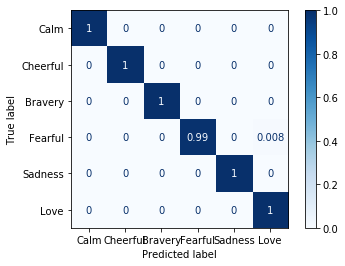

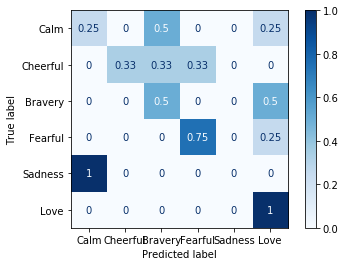

In [6]:
print_res("Random Oversampling",x_os,y_os,random_search_mlp)
test_res("Random Oversampling",x_val,y_val,random_search_mlp)

Best Score: 0.7280
activation => relu
alpha => 0.0003
batch_size => 16
early_stopping => False
learning_rate => adaptive
max_iter => 750
momentum => 0.8511013917812551
nesterovs_momentum => False
shuffle => True
solver => lbfgs
Splits: 10
SMOTE Train Accuracy: 99.8667%
SMOTE Validation Accuracy: 28.57%
SMOTE F1-score: 0.22


(28.57142857142857, 0.2207792207792208)

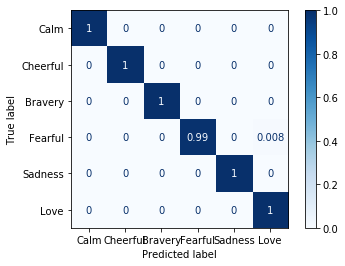

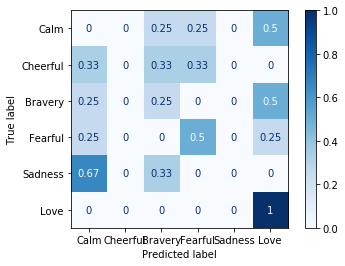

In [7]:
print_res("SMOTE",x_smote,y_smote,random_search_mlp)
test_res("SMOTE",x_val,y_val,random_search_mlp)

In [4]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# 28.57% 0.28
feat_sel_2 = SelectFromModel(\
                estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
                                    random_state=481516234))
feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


This cell instantiates the Stochastic Gradient Descent object and the hyperparameter search object.

In [5]:
# SGDClassifier, RandomizedSearch
random_search_iterations = 200
k_folds = 10
rand_seed = 3249807

parameters = {
    'loss' : [ 'hinge', 'log', 'modified_huber', 'squared_hinge', \
              'perceptron', 'squared_loss', 'huber', \
              'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha': [3e-4],
    'l1_ratio': uniform(loc=0,scale=1),
    'fit_intercept' : [True, False],
    'max_iter' : [1000],
    'shuffle' : [True, False],
    'eta0' : uniform(loc=0.01,scale=0.99),
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'early_stopping' : [True, False],
    'warm_start' : [True, False],
    'average' : [True,False]
}
sgdc = SGDClassifier(random_state=rand_seed)
random_search_sgdc = RandomizedSearchCV(sgdc, parameters,cv=k_folds,\
                                        n_iter=random_search_iterations,\
                                        random_state=rand_seed, n_jobs=-1)

The following cells are where the stochastic gradient descent model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set.

Best Score: 0.3540
alpha => 0.0003
average => True
early_stopping => False
eta0 => 0.02544228062424291
fit_intercept => False
l1_ratio => 0.552699331889073
learning_rate => invscaling
loss => modified_huber
max_iter => 1000
penalty => l2
shuffle => False
warm_start => True
Splits: 10
Vanilla Train Accuracy: 37.1571%
Vanilla Validation Accuracy: 14.29%
Vanilla F1-score: 0.05


(14.285714285714285, 0.049689440993788817)

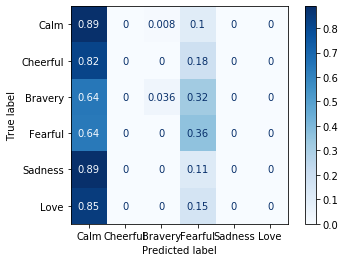

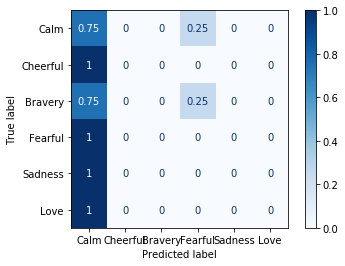

In [6]:
print_res("Vanilla",x_train,y_train,random_search_sgdc)
test_res("Vanilla",x_val,y_val,random_search_sgdc)

Best Score: 0.3933
alpha => 0.0003
average => True
early_stopping => True
eta0 => 0.8512881286594328
fit_intercept => True
l1_ratio => 0.7408603854916903
learning_rate => adaptive
loss => hinge
max_iter => 1000
penalty => l2
shuffle => True
warm_start => False
Splits: 10
Random Oversampling Train Accuracy: 44.8000%
Random Oversampling Validation Accuracy: 23.81%
Random Oversampling F1-score: 0.22


(23.809523809523807, 0.21859410430839002)

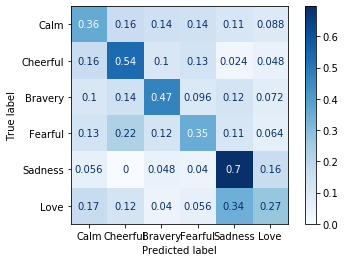

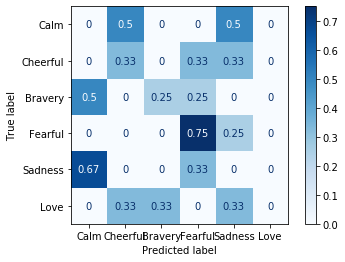

In [7]:
print_res("Random Oversampling",x_os,y_os,random_search_sgdc)
test_res("Random Oversampling",x_val,y_val,random_search_sgdc)

Best Score: 0.4200
alpha => 0.0003
average => False
early_stopping => False
eta0 => 0.1957396030053729
fit_intercept => True
l1_ratio => 0.10041528614531581
learning_rate => adaptive
loss => hinge
max_iter => 1000
penalty => l2
shuffle => True
warm_start => False
Splits: 10
SMOTE Train Accuracy: 45.2000%
SMOTE Validation Accuracy: 14.29%
SMOTE F1-score: 0.15


(14.285714285714285, 0.15192743764172337)

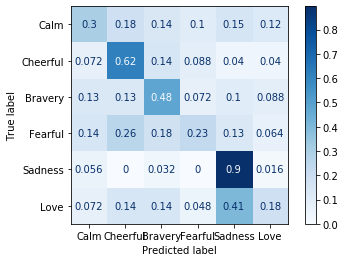

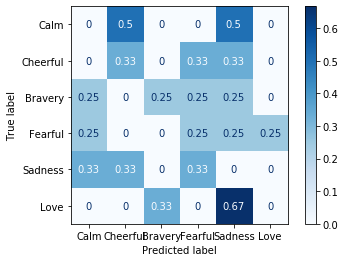

In [8]:
print_res("SMOTE",x_smote,y_smote,random_search_sgdc)
test_res("SMOTE",x_val,y_val,random_search_sgdc)